In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [5]:
#Đọc dữ liệu
df=pd.read_csv('academic salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [6]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [12]:
x=df[['yrs.since.phd','yrs.service','salary']].corr()

<Axes: >

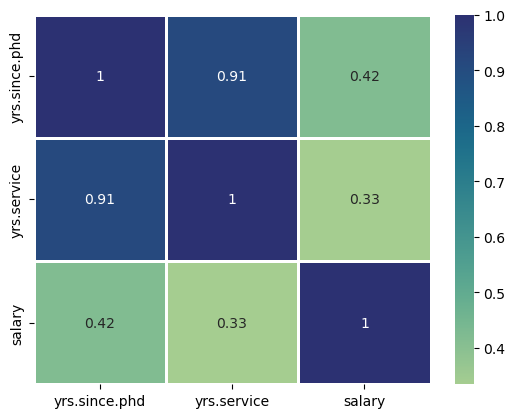

In [13]:
sns.heatmap(x,annot=True,linewidths=1,linecolor='white',cmap='crest')

In [16]:
#Tạo biến giả
df1=pd.get_dummies(df,drop_first=True,dtype=int)
df1

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1
1,20,16,173200,0,1,1,1
2,4,3,79750,1,0,1,1
3,45,39,115000,0,1,1,1
4,40,41,141500,0,1,1,1
...,...,...,...,...,...,...,...
392,33,30,103106,0,1,0,1
393,31,19,150564,0,1,0,1
394,42,25,101738,0,1,0,1
395,25,15,95329,0,1,0,1


In [22]:
#Tạo x, y và add constant
y=df1['salary']
x=df1.drop(['salary','yrs.since.phd'],axis=1)
x=sm.add_constant(x)
x

,const,yrs.service,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,1.0,18,0,1,1,1
1,1.0,16,0,1,1,1
2,1.0,3,1,0,1,1
3,1.0,39,0,1,1,1
4,1.0,41,0,1,1,1
...,...,...,...,...,...,...
392,1.0,30,0,1,0,1
393,1.0,19,0,1,0,1
394,1.0,25,0,1,0,1
395,1.0,15,0,1,0,1


In [26]:
#Tạo test sample và train sample
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1502)

In [27]:
#regression model
model = sm.OLS(endog=y_train,exog=x_train).fit()

In [29]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     56.35
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           1.36e-41
Time:                        13:37:52   Log-Likelihood:                -3613.7
No. Observations:                 317   AIC:                             7239.
Df Residuals:                     311   BIC:                             7262.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.014e+04   5165.530     15.514

In [39]:
y_prediction = 80140-13610*x_test['rank_AsstProf']+35200*x_test['rank_Prof']+15430*x_test['discipline_B']
y_prediction

364    115340
30     130770
378    115340
188     95570
155    130770
        ...  
343    130770
366    115340
79      81960
135    115340
25     115340
Length: 80, dtype: int32

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred=model.predict(x_test)


mean_absolute_error(y_pred,y_test)

18223.344325645485

In [41]:
np.sqrt(mean_squared_error(y_pred, y_test))

25749.742362753812

In [44]:
df=pd.read_csv('Clothing.csv')

In [47]:
cloth=df.corr()
cloth

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
tsales,1.000000,0.469888,0.240982,0.128367,0.565009,0.390844,0.181001,0.709196,0.552327,0.190539,0.205180,0.533597,0.180831
sales,0.469888,1.000000,0.137350,0.147894,0.237185,0.050085,-0.014293,0.262997,0.205091,0.000905,-0.013918,-0.293791,0.065574
margin,0.240982,0.137350,1.000000,0.052376,0.109444,0.183730,-0.101336,0.296073,0.295026,0.047463,0.051493,0.201822,0.478415
nown,0.128367,0.147894,0.052376,1.000000,0.062108,0.057104,0.006628,0.402468,0.136337,0.073464,0.116600,0.089782,-0.041555
nfull,0.565009,0.237185,0.109444,0.062108,1.000000,0.288799,0.084223,0.531318,0.125052,0.196623,0.183183,0.349672,0.081446
npart,0.390844,0.050085,0.183730,0.057104,0.288799,1.000000,0.037328,0.249084,-0.024095,0.233605,0.094312,0.366469,0.177349
naux,0.181001,-0.014293,-0.101336,0.006628,0.084223,0.037328,1.000000,0.209681,0.040014,-0.053327,0.000232,0.219151,-0.006457
hoursw,0.709196,0.262997,0.296073,0.402468,0.531318,0.249084,0.209681,1.000000,0.807764,0.193967,0.231057,0.575910,0.206368
hourspw,0.552327,0.205091,0.295026,0.136337,0.125052,-0.024095,0.040014,0.807764,1.000000,0.117645,0.175445,0.435002,0.247680
inv1,0.190539,0.000905,0.047463,0.073464,0.196623,0.233605,-0.053327,0.193967,0.117645,1.000000,0.449151,0.232168,-0.012407


<Axes: >

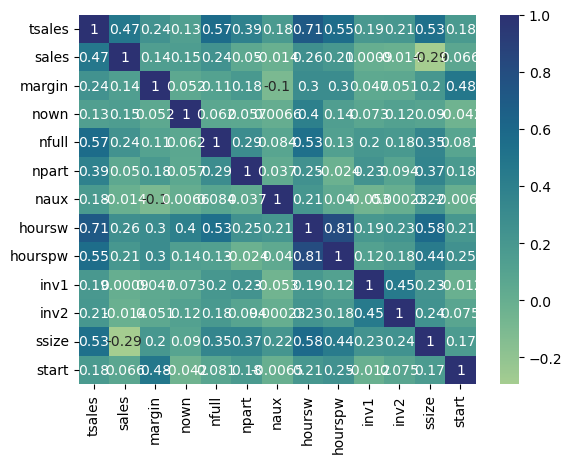

In [48]:
sns.heatmap(cloth,annot=True,cmap='crest')

In [63]:
y=df['tsales']
x=df.drop(['tsales','hoursw','hourspw'],axis=1)
x=sm.add_constant(x)
x

,const,sales,margin,nown,nfull,npart,naux,inv1,inv2,ssize,start
0,1.0,4411.765,41.0,1.0,1.0000,1.0000,1.5357,17166.67,27177.04,170,41.0
1,1.0,4280.878,39.0,2.0,2.0000,3.0000,1.5357,17166.67,27177.04,450,39.0
2,1.0,4166.667,40.0,1.0,2.0000,2.2222,1.4091,292857.20,71570.55,300,40.0
3,1.0,2670.104,40.0,1.0,1.0000,1.2833,1.3673,22207.04,15000.00,260,40.0
4,1.0,15000.000,44.0,2.0,1.9556,1.2833,1.3673,22207.04,10000.00,50,44.0
...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,5000.000,37.0,1.0,1.9231,1.0000,1.5357,17166.67,80000.00,100,90.0
396,1.0,16666.670,40.0,1.0,8.0000,9.0000,1.0000,292857.20,126800.00,300,76.0
397,1.0,5173.810,40.0,1.0,1.0000,1.5946,1.5357,17166.67,27177.04,100,89.0
398,1.0,3339.520,36.0,1.0,2.0000,1.5946,2.0000,17166.67,27177.04,375,72.0


In [64]:
model = sm.OLS(endog=y,exog=x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 tsales   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     117.8
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          4.31e-111
Time:                        14:45:53   Log-Likelihood:                -5599.2
No. Observations:                 400   AIC:                         1.122e+04
Df Residuals:                     389   BIC:                         1.126e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -6.3e+05   1.34e+05     -4.716      0.0

In [ ]:
#VIF - tìm hiểu cách chạy VIF